In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print("Customers Data Overview:")
print(customers.info())
print(customers.head())

print("\nProducts Data Overview:")
print(products.info())
print(products.head())

print("\nTransactions Data Overview:")
print(transactions.info())
print(transactions.head())

Customers Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0

In [5]:
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [8]:
df = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID',how='left')

In [10]:
print('\nSummary statistics')
print(df.head(5))


Summary statistics
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLivi

In [14]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

In [15]:
#Exploration Data Analysis
#1. Sales trends over time
df['MonthWise'] = df['TransactionDate'].dt.to_period('M')
sales_trend = df.groupby('MonthWise')['TotalValue'].sum()

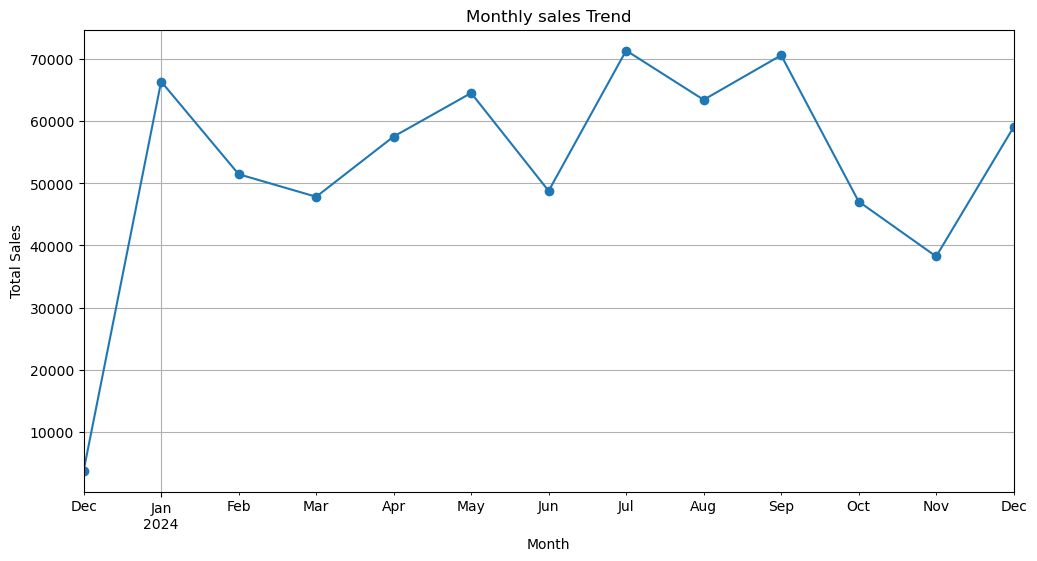

In [16]:
plt.figure(figsize=(12,6))
sales_trend.plot(title='Monthly sales Trend', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

In [31]:
#2 Top Selling Products
top_products=df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

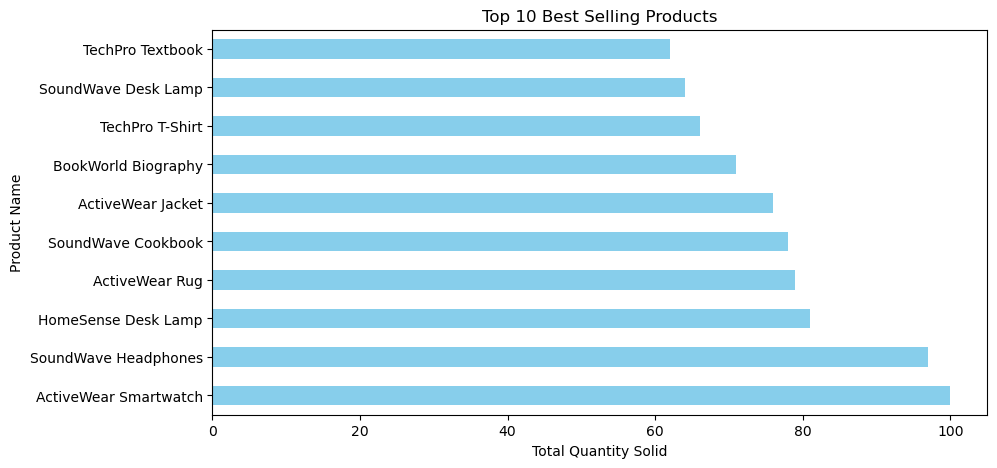

In [32]:
plt.figure(figsize=(10,5))
top_products.plot(kind='barh',title="Top 10 Best Selling Products",color='skyblue')
plt.xlabel('Total Quantity Solid')
plt.ylabel("Product Name")
plt.show()

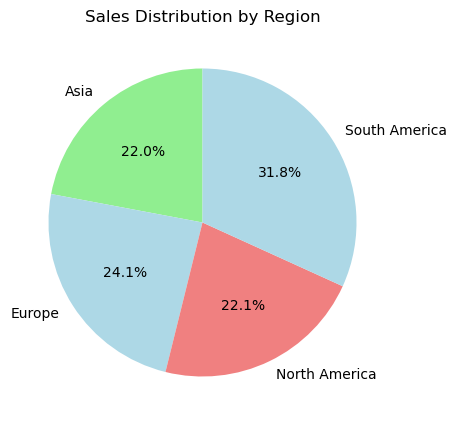

In [35]:
regional_sales = df.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(8,5))
regional_sales.plot(kind='pie',autopct='%1.1f%%',  startangle=90,colors=['lightgreen','lightblue','lightcoral','lightblue'])
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()


C:\Users\rajag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


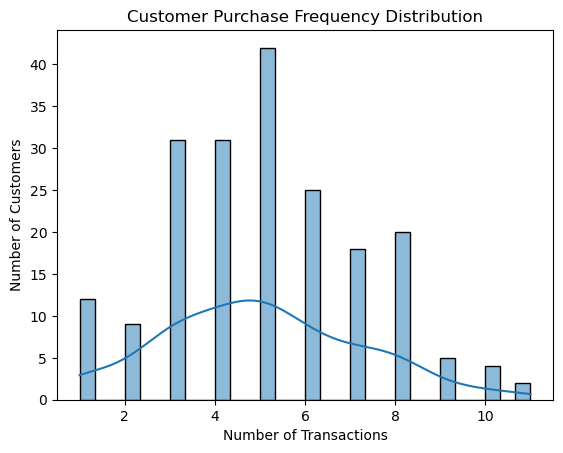

In [37]:
#4 Custoer purchase frequency
purchase_frequency = df['CustomerID'].value_counts()
sns.histplot(purchase_frequency, bins=30, kde=True)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\rajag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


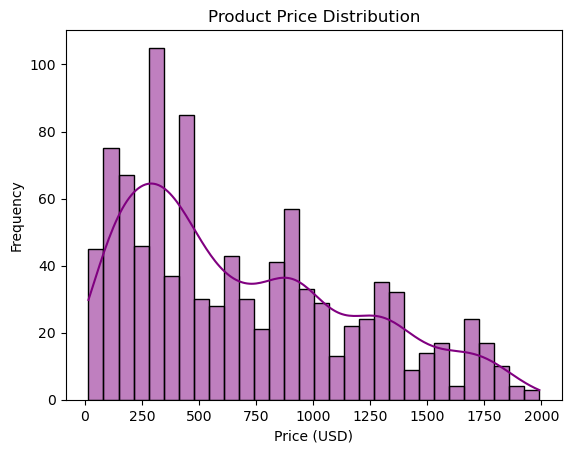

In [43]:
# 5. Price distribution
sns.histplot(df['TotalValue'], bins=30, kde=True, color='purple')
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()